# Logistic Regression - Leukemia Remission Dataset

Logistic Regression performed on the Leukemia Remission Dataset

The data fields as below

**REMISS** - Response variable indicating whether leukemia remission occurred. 1 denotes remission occurrence<br>
**CELL**   - Cellularity of the marrow clot section<br>
**SMEAR**  - smear differential percentage of blasts <br>
**INFIL**  - percentage of absolute marrow leukemia cell infiltrate<br> 
**LI**     - percentage labeling index of the bone marrow leukemia cells<br> 
**BLAST**  - absolute number of blasts in the peripheral blood<br>
**TEMP**   - highest temperature prior to start of treatment<br> 

### Library imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

## Load the dataset and preliminary validations

In [3]:
# Load data from the txt file and verify the data load

# The data file as a UTF-16LE encoding and hence passing it while reading the file

leukemia = pd.read_csv("resources/leukemia_remission.txt", sep="\t", encoding="UTF-16LE")

leukemia.head()

,REMISS,CELL,SMEAR,INFIL,LI,BLAST,TEMP
0,1,0.8,0.83,0.66,1.9,1.10,1.00
1,1,0.9,0.36,0.32,1.4,0.74,0.99
2,0,0.8,0.88,0.70,0.8,0.18,0.98
3,0,1.0,0.87,0.87,0.7,1.05,0.99
4,1,0.9,0.75,0.68,1.3,0.52,0.98


In [4]:
# Check on the data structure
leukemia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   REMISS  27 non-null     int64  
 1   CELL    27 non-null     float64
 2   SMEAR   27 non-null     float64
 3   INFIL   27 non-null     float64
 4   LI      27 non-null     float64
 5   BLAST   27 non-null     float64
 6   TEMP    27 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 1.6 KB


The dataset has 27 data elements with 7 columns including the response variable

In [5]:
# Check on any missing values
leukemia.isnull().sum()

REMISS    0
CELL      0
SMEAR     0
INFIL     0
LI        0
BLAST     0
TEMP      0
dtype: int64

The dataset has no missing values

In [6]:
# We will run the summary statistics - Since attributes are numeric, this is beneficial

leukemia.describe()

,REMISS,CELL,SMEAR,INFIL,LI,BLAST,TEMP
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,0.333333,0.881481,0.635185,0.570741,1.003704,0.688519,0.997407
std,0.480384,0.186645,0.214052,0.237567,0.467795,0.534960,0.014830
min,0.000000,0.200000,0.320000,0.080000,0.400000,0.000000,0.980000
25%,0.000000,0.825000,0.430000,0.335000,0.650000,0.230000,0.990000
50%,0.000000,0.950000,0.650000,0.630000,0.900000,0.520000,0.990000
75%,1.000000,1.000000,0.835000,0.740000,1.250000,1.060000,1.005000
max,1.000000,1.000000,0.970000,0.920000,1.900000,2.060000,1.040000


**We will dive more into these attributes in the exploratory data analysis section below**

## Exploratory Data Analysis

Frequency Distribution of the REMISS Variable


0    18
1     9
Name: REMISS, dtype: int64

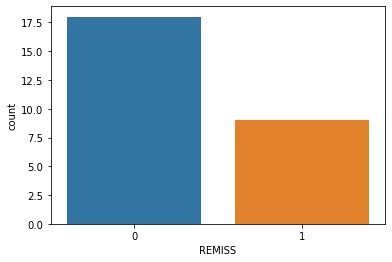

In [7]:
# Explore the response variable

sns.countplot(x='REMISS', data=leukemia)

print(f"Frequency Distribution of the REMISS Variable")
leukemia['REMISS'].value_counts()

It is observed that the number of remission data points are of 50% of the number of non remission data points

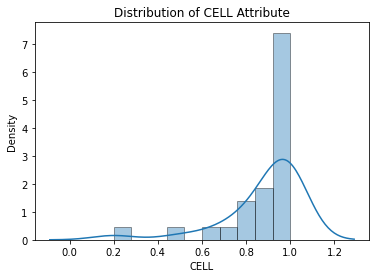

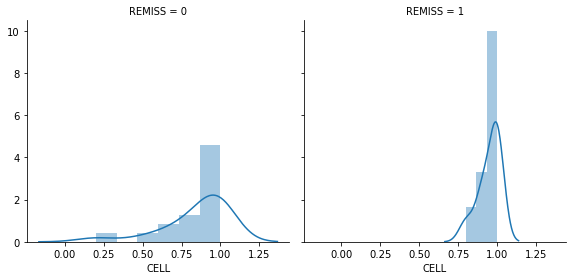

In [8]:
# Let us Explore the CELL variable
plt.title('Distribution of CELL Attribute')
sns.distplot(leukemia['CELL'], hist_kws=dict(edgecolor='k', linewidth=1), bins=10)

# If we observe the distribution of CELL by response variable REMISS
g = sns.FacetGrid(data=leukemia, col='REMISS', col_wrap=2, height=4, aspect=1)
g.map(sns.distplot, 'CELL').add_legend();

CELL attribute has a negatively skewed distribution and the same is shown when the attribute is observed by the response variable. However for REMISS=1 (leukemia remission), we see CELL atrribute has a higher density as compared to CELL when REMISS=0 - No leukemia remission. 

**Marrow clot has higher density (average cellularity) when Leukemia remission occurs**

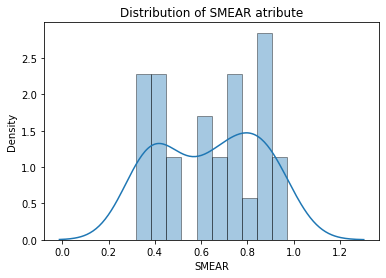

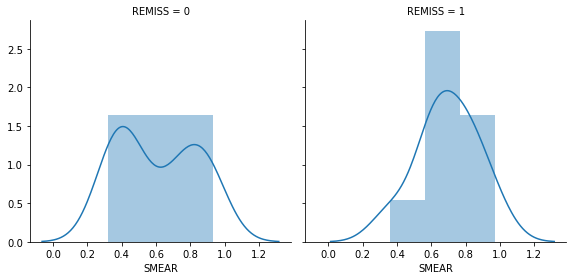

In [9]:
# Let us Explore the SMEAR variable
plt.title("Distribution of SMEAR atribute")
sns.distplot(leukemia['SMEAR'], hist_kws=dict(edgecolor='k', linewidth=1), bins=10)

# If we observe the distribution of SMEAR by response variable REMISS

g = sns.FacetGrid(data=leukemia, col='REMISS', col_wrap=2, height=4, aspect=1)
g.map(sns.distplot, 'SMEAR').add_legend();

SMEAR attribute has a bimodal distribution and the same is shown when the attribute is observed by the response variable, REMISS

However for REMISS=1 (leukemia remission), we see SMEAR atrribute has a higher density as compared to SMEAR when REMISS=0 - No leukemia remission. 

**Smear differential percentage of blasts has higher density when Leukemia remission occurs**

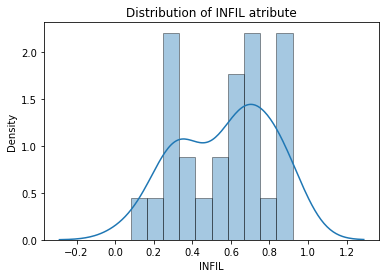

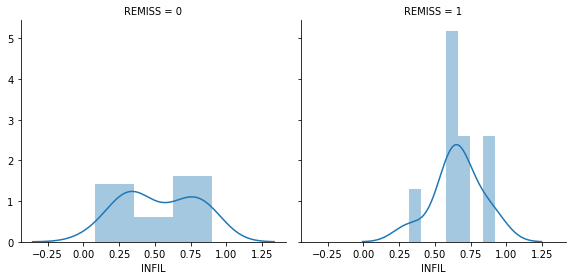

In [10]:
# Let us Explore the INFIL variable
plt.title("Distribution of INFIL atribute")
sns.distplot(leukemia['INFIL'], hist_kws=dict(edgecolor='k', linewidth=1), bins=10)

# If we observe the distribution of SMEAR by response variable REMISS

g = sns.FacetGrid(data=leukemia, col='REMISS', col_wrap=2, height=4, aspect=1)
g.map(sns.distplot, 'INFIL').add_legend();

INFIL attribute has a bimodal distribution and the same is shown when the attribute is observed by the response variable, REMISS = 0

However for REMISS=1 (leukemia remission), we see INFIL atrribute has a higher density as compared to INFIL when REMISS=0 - No leukemia remission. 

**percentage of absolute marrow leukemia cell infiltrate has higher density when Leukemia remission occurs**

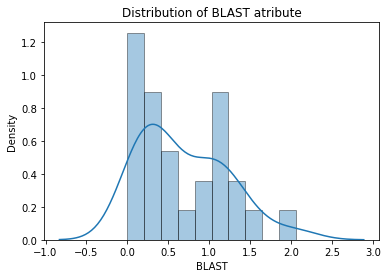

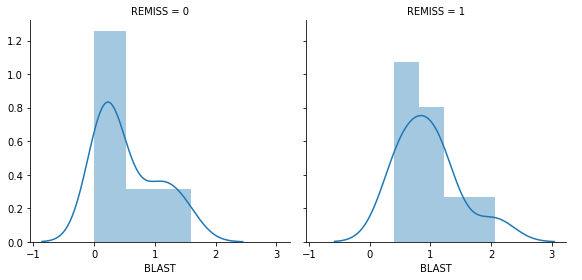

In [11]:
# Let us Explore the BLAST variable
plt.title("Distribution of BLAST atribute")
sns.distplot(leukemia['BLAST'], hist_kws=dict(edgecolor='k', linewidth=1), bins=10)

# If we observe the distribution of LI by response variable REMISS

g = sns.FacetGrid(data=leukemia, col='REMISS', col_wrap=2, height=4, aspect=1)
g.map(sns.distplot, 'BLAST').add_legend();

**absolute number of blasts in the peripheral blood however almost has the same density whether or not leukemia remission has ocurred or not. However in case of no leukemia remission the averae number of blasts in peripheral blood is lower than the patients where remission has occurred.**

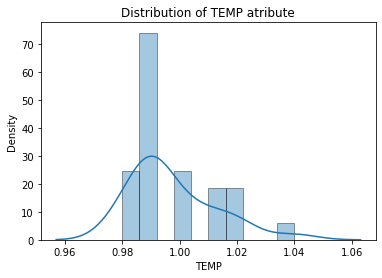

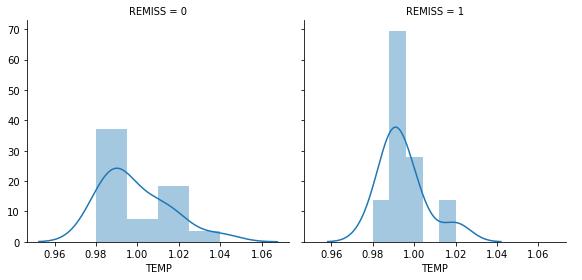

In [12]:
# Let us Explore the TEMP variable
plt.title("Distribution of TEMP atribute")
sns.distplot(leukemia['TEMP'], hist_kws=dict(edgecolor='k', linewidth=1), bins=10)

# If we observe the distribution of TEMP by response variable REMISS

g = sns.FacetGrid(data=leukemia, col='REMISS', col_wrap=2, height=4, aspect=1)
g.map(sns.distplot, 'TEMP').add_legend();

**We can observe for patients where leukemia remission has occurred, most of the density concentration is on a lower side with far lesser variance as compared to patients where remission has not occurred. So it is evident that temperature remains stable and on the lower side for patients where remission has occurred**

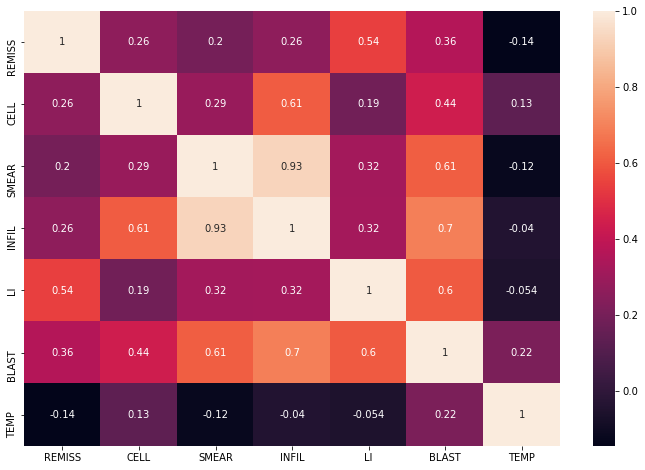

In [13]:
# We will build the correlation heatmap amongst the attributes

plt.figure(figsize=(12, 8))
sns.heatmap(leukemia.corr(), annot=True);

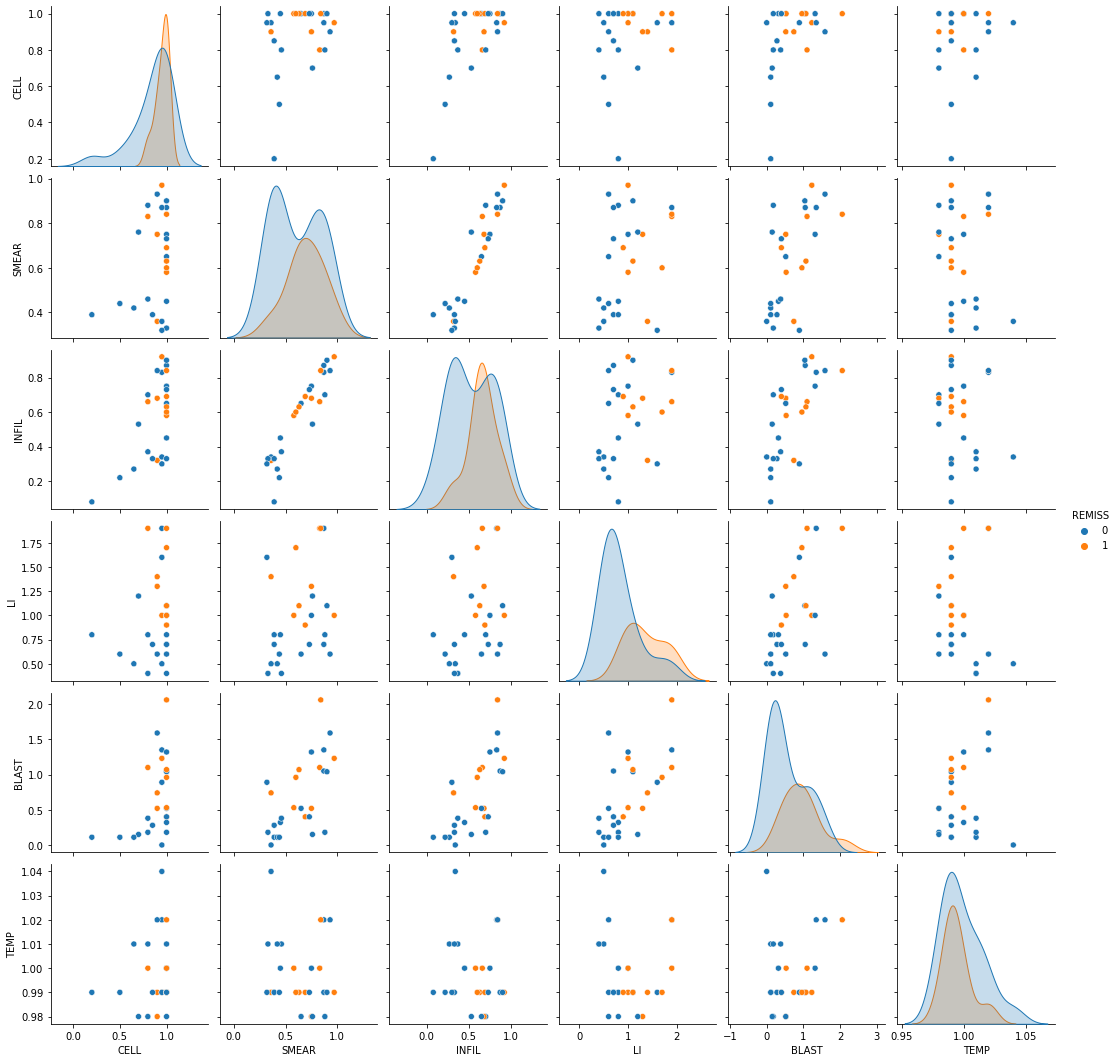

In [14]:
# we will attempt to do a joint distribution across the dataset by the response variable

sns.pairplot(data=leukemia, hue='REMISS');

## Model Logistic Regression

## Seggregate features and target variable and perform a train, test split

Since the response variable "REMISS" is an imbalanced class - We would use stratified sampling while doing the training and test split

In [15]:
features = leukemia[['CELL', 'SMEAR', 'INFIL',
       'LI', 'BLAST', 'TEMP']]
target = leukemia['REMISS']

from sklearn.model_selection import train_test_split

features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                            target, 
                                                                            test_size=0.3, random_state=101,
                                                                           stratify = target)

## Build the model

In [16]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(features_train, target_train)

LogisticRegression()

### Displaying the coefficients and building the Logisitc Regression equation

In [17]:
print(f"Intercept of the fitted model : {logmodel.intercept_}")
print("\n")
print(f"Coefficients of the fitted logistic model")
log_odds = logmodel.coef_[0]
pd.DataFrame(log_odds, 
             features.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

Intercept of the fitted model : [-2.44089114]


Coefficients of the fitted logistic model


,coef
LI,1.027367
BLAST,0.421926
INFIL,0.129351
CELL,0.124412
SMEAR,0.105536
TEMP,-0.017640


### Model Predictions and Evaluation

In [18]:
predictions = logmodel.predict(features_test)

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Confusion Matrix")
print(confusion_matrix(target_test, predictions))
print("\n")
print("Accuracy Score")
print(accuracy_score(target_test, predictions))
print("\n")
print("Classification Report")
print(classification_report(target_test, predictions))

Confusion Matrix
[[6 0]
 [3 0]]


Accuracy Score
0.6666666666666666


Classification Report
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         6
           1       0.00      0.00      0.00         3

    accuracy                           0.67         9
   macro avg       0.33      0.50      0.40         9
weighted avg       0.44      0.67      0.53         9



#### Plotting the Precision Recall curve

Since there is a large class imbalance, precision recall curve is preferred over ROC curve.
A precision-recall curve shows the relationship between precision (= positive predictive value) and recall (= sensitivity) for every possible cut-off.

In [20]:
lr_probs = logmodel.predict_proba(features_test)

Score - 0.8500000000000001


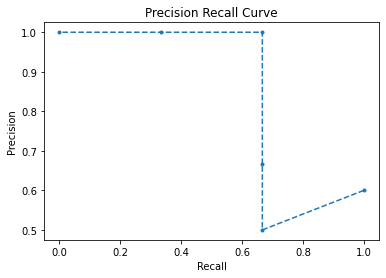

In [21]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

# calculate roc curves
lr_precision, lr_recall, _ = precision_recall_curve(target_test, lr_probs[:, 1])
plt.plot(lr_recall, lr_precision, marker='.', linestyle='--')

# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title("Precision Recall Curve");

print(f"Score - {auc(lr_recall, lr_precision)}")

## Building Logistic Regression Model using K Fold Cross Validation

Since we are dealing with imbalanced class, we will perform stratfied KFold Validation

In [22]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate

# initialize the stratifiedKFold
stratKFold = StratifiedKFold(n_splits=10, random_state=100, shuffle=True)

# Initialize the model
cvModel = LogisticRegression()

#### Execute the model

In [23]:
scoring_list = ['accuracy', 'precision', 'recall', 'f1']


scores = cross_validate(cvModel, features, target, scoring=scoring_list, cv=stratKFold, verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


#### Get the key confusion Matrix parameters from KFold Cross Validations

In [24]:
print(f"Mean Accuracy - {np.mean(scores['test_accuracy'])}")
print(f"Mean Precision - {np.mean(scores['test_precision'])}")
print(f"Mean Recall - {np.mean(scores['test_recall'])}")
print(f"Mean F1 - {np.mean(scores['test_f1'])}")

Mean Accuracy - 0.6833333333333333
Mean Precision - 0.3
Mean Recall - 0.3
Mean F1 - 0.3


#### Another approach would be to use the Logistic Regression model to run on the stratifiedKFold with validation

In [25]:
from sklearn.linear_model import LogisticRegressionCV

C_values = [0.001, 0.01, 0.05, 0.1, 1., 10., 100.]
logistic = LogisticRegressionCV(Cs=C_values, fit_intercept=True, cv=stratKFold, verbose=1, 
                                random_state=101)

logistic.fit(features_train, target_train)

# The coefficients and intercepts can be arrived at

print("Train Coefficient:" , logistic.coef_) #weights of each feature
print("\n")
print("Train Intercept:" , logistic.intercept_) #value of intercept

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
Train Coefficient: [[ 2.49501312e-04  4.08940215e-04  4.68798846e-04  2.39599075e-03
   1.70923706e-03 -1.33985325e-05]]


Train Intercept: [-0.69777745]
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


In [26]:
cvPredictions = logistic.predict(features_test)

print("Confusion Matrix")
print(confusion_matrix(target_test, cvPredictions))
print("\n")
print("Accuracy Score")
print(accuracy_score(target_test, cvPredictions))
print("\n")
print("Classification Report")
print(classification_report(target_test, cvPredictions))

Confusion Matrix
[[6 0]
 [3 0]]


Accuracy Score
0.6666666666666666


Classification Report
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         6
           1       0.00      0.00      0.00         3

    accuracy                           0.67         9
   macro avg       0.33      0.50      0.40         9
weighted avg       0.44      0.67      0.53         9



## Alternative Approach - 

## Using Synthetic Minority Oversampling Technique (SMOTE) to improve Accuracy

In [27]:
# We will do the train_test split again to reinitialize the variables ..

features = leukemia[['CELL', 'SMEAR', 'INFIL',
       'LI', 'BLAST', 'TEMP']]
target = leukemia['REMISS']

from sklearn.model_selection import train_test_split

features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                            target, 
                                                                            test_size=0.3, random_state=101,
                                                                           stratify = target)

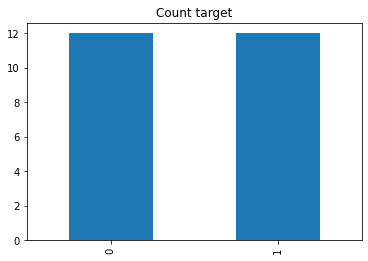

In [28]:
from imblearn.over_sampling import SMOTE

# Lets do the minority oversampling
smote = SMOTE(sampling_strategy='minority', n_jobs=-1)

features_sampled, target_sampled = smote.fit_resample(features_train, target_train)
target_sampled.value_counts().plot(kind='bar', title='Count target');

We see the target variable is now oversampled

In [29]:
# We will train the model now on oversampled data

from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(features_sampled, target_sampled)

LogisticRegression()

In [30]:
### Displaying the coefficients and building the Logisitc Regression equation

print(f"Intercept of the fitted model : {logmodel.intercept_}")
print("\n")
print(f"Coefficients of the fitted logistic model")
log_odds = logmodel.coef_[0]
pd.DataFrame(log_odds, 
             features.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

Intercept of the fitted model : [-2.33580035]


Coefficients of the fitted logistic model


,coef
LI,1.371923
BLAST,0.529134
CELL,0.205241
INFIL,0.129736
SMEAR,0.066876
TEMP,-0.032461


In [31]:
# Model Predictions and Evaluations

predictions = logmodel.predict(features_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Confusion Matrix")
print(confusion_matrix(target_test, predictions))
print("\n")
print("Accuracy Score")
print(accuracy_score(target_test, predictions))
print("\n")
print("Classification Report")
print(classification_report(target_test, predictions))

Confusion Matrix
[[6 0]
 [1 2]]


Accuracy Score
0.8888888888888888


Classification Report
              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.67      0.80         3

    accuracy                           0.89         9
   macro avg       0.93      0.83      0.86         9
weighted avg       0.90      0.89      0.88         9



In [32]:
# Probability predictions can be done as well on Test features
lr_probs = logmodel.predict_proba(features_test)
lr_probs

array([[0.58626458, 0.41373542],
       [0.49149423, 0.50850577],
       [0.64121686, 0.35878314],
       [0.80657339, 0.19342661],
       [0.79017666, 0.20982334],
       [0.69997309, 0.30002691],
       [0.73420913, 0.26579087],
       [0.59355473, 0.40644527],
       [0.4514975 , 0.5485025 ]])

Score - 0.8500000000000001


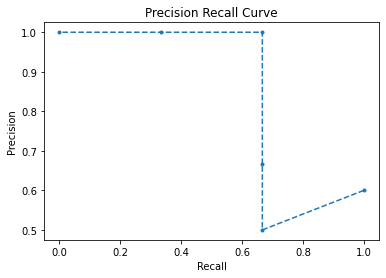

In [33]:
# We will once again plot the precision-recall curve

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

# calculate roc curves
lr_precision, lr_recall, _ = precision_recall_curve(target_test, lr_probs[:, 1])
plt.plot(lr_recall, lr_precision, marker='.', linestyle='--')

# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title("Precision Recall Curve");

print(f"Score - {auc(lr_recall, lr_precision)}")

## Conclusions

1. Leukemia dataset has an unbalanced distribution of the target variable - REMISS
2. REMISS attribute has the maximum correlation with LI(percentage labelling index of bone marrow cells) attribute, with all other attributes the correlation is non existing 
3. Since the class is imbalanced a train-test split was done using s stratified sampling on the REMISS attribute.
4. Logistic regression on this random train-test split, gave us an accuracy of 66%. The coefficients and intercept is all given above
5. 10 Fold cross validation was performed with again a StratifiedKFold approach on account of unbalanced class. 
6. 10 Fold cross validation increased our accuracy to 68% on account of greater sampling and ability of the logistic regression model to run on the same data for training and test.

#### Using SMOTE

7. When SMOTE (Synthetic Minority Oversampling Technique) is used by oversampling the examples in the minority class in the training dataset, allowing the model to learn the decision boundary better
8. Specifically, a random example from the minority class is first chosen. Then k of the nearest neighbors for that example are found (typically k=5). A randomly selected neighbor is chosen and a synthetic example is created at a randomly selected point between the two examples in feature space.
9. Using SMOTE the accuracy increases to 77% and we see Logistic Regression is able to identify a positive Leukemia remission case in the test set